In [32]:
import glob
import argparse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

evaluation_methods = ['ari', 'nmi', 'purity']
ari_best_result = dict()
nmi_best_result = dict()
purity_best_result = dict()


In [33]:
total = 0
for dirs in glob.glob('beta_05_23/*'):
    for em in evaluation_methods:
        with open(dirs + '/' + em + '/total_best_result.txt') as f:
            lines = f.read().splitlines()
            for i, line in enumerate(lines):
                if i == 0: continue
                line = line.split('=')[-1].split(':')
                k, v = line[0].strip(), line[-1].strip()
                if em == 'ari':
                    if k in ari_best_result:
                        ari_best_result[k] += float(v)
                    else:
                        ari_best_result[k] = float(v)
                elif em == 'nmi':
                    if k in nmi_best_result:
                        nmi_best_result[k] += float(v)
                    else:
                        nmi_best_result[k] = float(v)
                else:
                    if k in purity_best_result:
                        purity_best_result[k] += float(v.split('%')[0])
                    else:
                        purity_best_result[k] = float(v.split('%')[0])
    total += 1


In [34]:
for k, v in ari_best_result.items():
    ari_best_result[k] = round(v / total, 3)
for k, v in nmi_best_result.items():
    nmi_best_result[k] = round(v / total, 3)
for k, v in purity_best_result.items():
    purity_best_result[k] = round(v / (total * 100), 3)

print(ari_best_result)
print(nmi_best_result)
print(purity_best_result)

{'jideca_b05g01re_23': 0.33, 'jideca_b05g1re_23': 0.255, 'jideca_b05g02re_23': 0.244, 'jideca_b05g05re_23': 0.22, 'jideca_b05g10re_23': 0.07}
{'jideca_b05g01re_23': 0.581, 'jideca_b05g1re_23': 0.494, 'jideca_b05g02re_23': 0.494, 'jideca_b05g05re_23': 0.48, 'jideca_b05g10re_23': 0.261}
{'jideca_b05g1re_23': 0.308, 'jideca_b05g02re_23': 0.292, 'jideca_b05g05re_23': 0.274, 'jideca_b05g01re_23': 0.308, 'jideca_b05g10re_23': 0.193}


In [35]:
df_ari = pd.DataFrame(list(ari_best_result.items()), columns=['parameters', 'ari'])
df_nmi = pd.DataFrame(list(nmi_best_result.items()), columns=['parameters', 'nmi'])
df_purity = pd.DataFrame(list(purity_best_result.items()), columns=['parameters', 'purity'])

df_ari['simple'] = df_ari['parameters'].apply(lambda x: x.split('_')[1].split('g')[1][0:])
#df_ari['simple'] = df_ari['simple'].apply(lambda x: float('0.' + x[1]) if x[0] == '0' else float(x))
df_ari['simple'] = df_ari['simple'].apply(lambda x: '0.' + x[1] if x[0] == '0' else x[0:-2])
df_ari['types'] = df_ari['parameters'].apply(lambda x:x.split('_')[1][-2:])
df_ari['types'] = df_ari['types'].apply(lambda x: 'real' if x == 're' else 'semantic')

df_nmi['simple'] = df_nmi['parameters'].apply(lambda x:x.split('_')[1].split('g')[1][0:])
#df_nmi['simple'] = df_nmi['simple'].apply(lambda x: float('0.' + x[1]) if x[0] == '0' else float(x))
df_nmi['simple'] = df_nmi['simple'].apply(lambda x: '0.' + x[1] if x[0] == '0' else x[0:-2])
df_nmi['types'] = df_nmi['parameters'].apply(lambda x:x.split('_')[1][-2:])
df_nmi['types'] = df_nmi['types'].apply(lambda x: 'real' if x == 're' else 'semantic')

df_purity['simple'] = df_purity['parameters'].apply(lambda x:x.split('_')[1].split('g')[1][0:])
#df_purity['simple'] = df_purity['simple'].apply(lambda x: float('0.' + x[1]) if x[0] == '0' else float(x))
df_purity['simple'] = df_purity['simple'].apply(lambda x: '0.' + x[1] if x[0] == '0' else x[0:-2])
df_purity['types'] = df_purity['parameters'].apply(lambda x:x.split('_')[1][-2:])
df_purity['types'] = df_purity['types'].apply(lambda x: 'real' if x == 're' else 'semantic')

In [36]:
# Adjust values with previous experiments
df_ari.loc[df_ari['parameters'] == 'jideca_b05g01re_23', 'ari'] = 0.328
df_nmi.loc[df_nmi['parameters'] == 'jideca_b05g01re_23', 'nmi'] = 0.579
df_purity.loc[df_purity['parameters'] == 'jideca_b05g01re_23', 'purity'] = 0.315

In [37]:
df_purity.loc[df_purity['types'] == 'real'].sort_values(by='simple')

,parameters,purity,simple,types
3,jideca_b05g01re_23,0.315,0.1,real
1,jideca_b05g02re_23,0.292,0.2,real
2,jideca_b05g05re_23,0.274,0.5,real
0,jideca_b05g1re_23,0.308,1,real
4,jideca_b05g10re_23,0.193,10,real


In [38]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

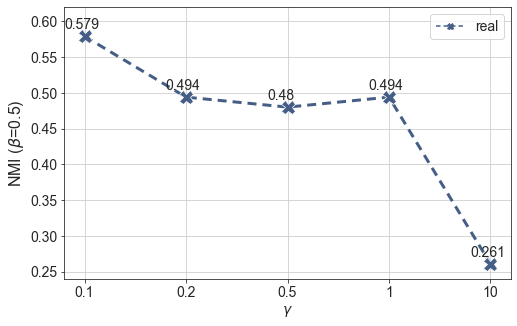

In [39]:
plt.figure(figsize=(8,5))
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#455E85']
#sns.lineplot(x='simple', y='nmi', data=df_nmi.loc[df_nmi['types'] == 're'].sort_values(by='simple'))
#sns.lineplot(x='simple', y='nmi', data=df_nmi.loc[df_nmi['types'] == 'se'].sort_values(by='simple'))
sns.lineplot(x='simple', y='nmi', data=df_nmi.sort_values(by='simple'), linewidth=3, palette=colors, hue='types', style='types', dashes=[(3, 2)], markers=['X'], markersize=14)
for i in df_nmi.groupby('types'):
    for x,y,m in i[1][['simple','nmi','nmi']].values:
        if x == '0.1': i = 0
        elif x == '0.2': i = 1
        elif x == '0.5': i = 2
        elif x == '1': i = 3
        else: i = 4
        plt.text(i - 0.2 , y + 0.01, m)
plt.ylim(0.24, 0.62)
plt.ylabel('NMI' + r' ($\beta$=0.5)', fontsize=16)
plt.xlabel(r'$\gamma$')
plt.legend(loc='best')
plt.savefig('../result/beta_05_23_nmi_means_.png', transparent=True)

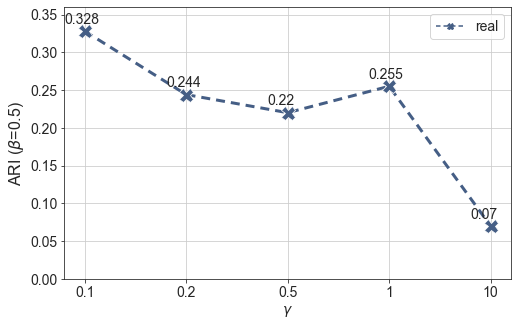

In [40]:
plt.figure(figsize=(8,5))
sns.lineplot(x='simple', y='ari', data=df_ari.sort_values(by='simple'), linewidth=3, palette=colors, hue='types', style='types', dashes=[(3, 2)], markers=['X'], markersize=14)
for i in df_ari.groupby('types'):
    for x,y,m in i[1][['simple','ari','ari']].values:
        if x == '0.1': i = 0
        elif x == '0.2': i = 1
        elif x == '0.5': i = 2
        elif x == '1': i = 3
        else: i = 4
        plt.text(i - 0.2 , y + 0.01, m)
plt.ylim(0.0, 0.36)
plt.ylabel('ARI' + r' ($\beta$=0.5)', fontsize=16)
plt.xlabel(r'$\gamma$')
plt.legend(loc='best')
plt.savefig('../result/beta_05_23_ari_means.png', transparent=True)

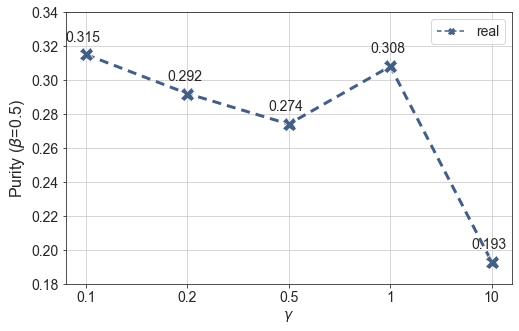

In [42]:
plt.figure(figsize=(8,5))
sns.lineplot(x='simple', y='purity', data=df_purity.sort_values(by='simple'), linewidth=3, palette=colors, hue='types', style='types', dashes=[(3, 2)], markers=['X'], markersize=14)
for i in df_purity.groupby('types'):
    for x,y,m in i[1][['simple','purity','purity']].values:
        if x == '0.1': i = 0
        elif x == '0.2': i = 1
        elif x == '0.5': i = 2
        elif x == '1': i = 3
        else: i = 4
        plt.text(i - 0.2 , y + 0.008, m)
plt.ylim(0.18, 0.34)
plt.ylabel('Purity' + r' ($\beta$=0.5)', fontsize=16)
plt.xlabel(r'$\gamma$')
plt.legend(loc='best')
plt.savefig('../result/beta_05_23_purity_means.png', transparent=True)

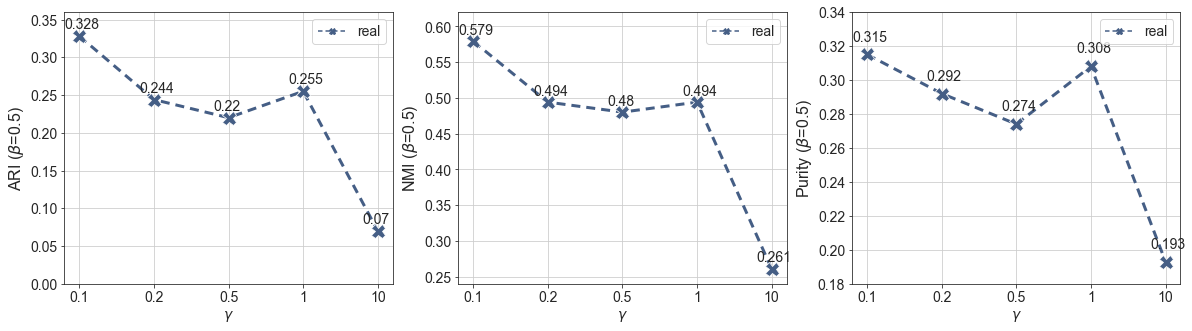

In [43]:
plt.figure(figsize=(20,5))
colors = ['#455E85']
plt.subplot(1, 3, 1)
sns.lineplot(x='simple', y='ari', data=df_ari.sort_values(by='simple'), linewidth=3, palette=colors, hue='types', style='types', dashes=[(3, 2)], markers=['X'], markersize=14)
for i in df_ari.groupby('types'):
    for x,y,m in i[1][['simple','ari','ari']].values:
        if x == '0.1': i = 0
        elif x == '0.2': i = 1
        elif x == '0.5': i = 2
        elif x == '1': i = 3
        else: i = 4
        plt.text(i - 0.2 , y + 0.01, m)
plt.ylim(0.0, 0.36)
plt.ylabel('ARI' + r' ($\beta$=0.5)', fontsize=16)
plt.xlabel(r'$\gamma$')
plt.legend(loc='best')


plt.subplot(1, 3, 2)
sns.lineplot(x='simple', y='nmi', data=df_nmi.sort_values(by='simple'), linewidth=3, palette=colors, hue='types', style='types', dashes=[(3, 2)], markers=['X'], markersize=14)
for i in df_nmi.groupby('types'):
    for x,y,m in i[1][['simple','nmi','nmi']].values:
        if x == '0.1': i = 0
        elif x == '0.2': i = 1
        elif x == '0.5': i = 2
        elif x == '1': i = 3
        else: i = 4
        plt.text(i - 0.2 , y + 0.01, m)
plt.ylim(0.24, 0.62)
plt.ylabel('NMI' + r' ($\beta$=0.5)', fontsize=16)
plt.xlabel(r'$\gamma$')
plt.legend(loc='best')

plt.subplot(1, 3, 3)
sns.lineplot(x='simple', y='purity', data=df_purity.sort_values(by='simple'), linewidth=3, palette=colors, hue='types', style='types', dashes=[(3, 2)], markers=['X'], markersize=14)
for i in df_purity.groupby('types'):
    for x,y,m in i[1][['simple','purity','purity']].values:
        if x == '0.1': i = 0
        elif x == '0.2': i = 1
        elif x == '0.5': i = 2
        elif x == '1': i = 3
        else: i = 4
        plt.text(i - 0.2 , y + 0.008, m)
plt.ylim(0.18, 0.34)
plt.ylabel('Purity' + r' ($\beta$=0.5)', fontsize=16)
plt.xlabel(r'$\gamma$')
plt.legend(loc='best')